Text(0.5, 1.0, 'GMM Classification')

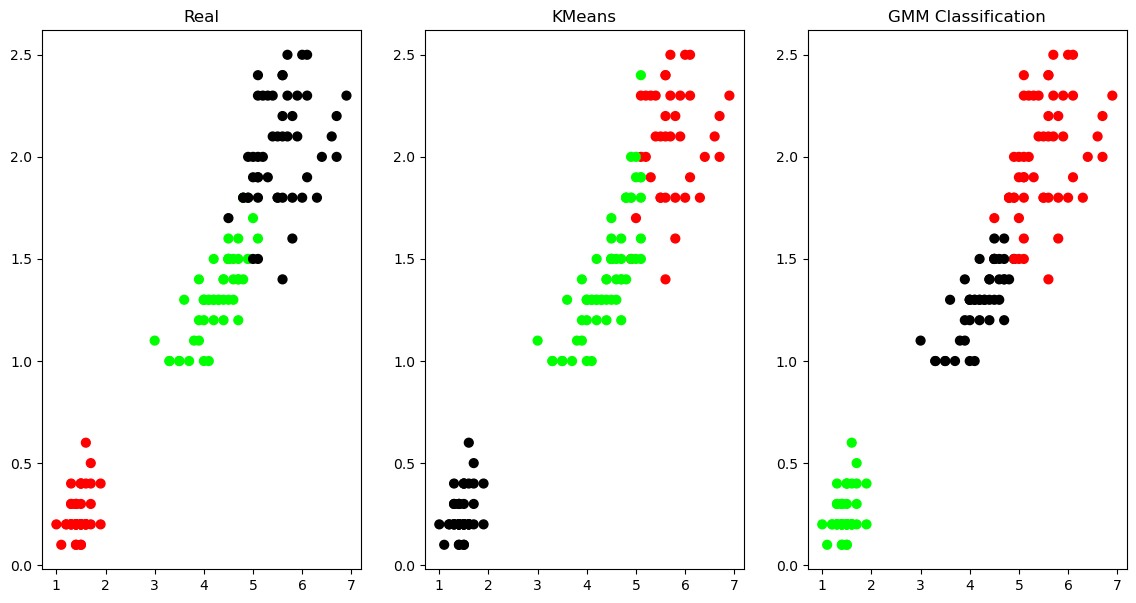

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
plt.figure(figsize=(14,7))
colormap = np.array(['red','lime','black'])

plt.subplot(1,3,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

plt.subplot(1,3,2)
model = KMeans(n_clusters = 3)
model.fit(x)
predy = np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[predy],s=40)
plt.title('KMeans')


scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa,columns=x.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')
